In [2]:
import pandas as pd
import numpy as np
from ipywidgets import interact
import matplotlib.pyplot as plt
import seaborn as sns

#Necessary for diaplaying all outputs; otherwise only gsd.colums will be displayed. 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

## How advertising campaigns impact the different categories people?

In [3]:
#Loading the dataframes
products=pd.read_csv("data/products.csv")
transactions=pd.read_csv("data/transactions.csv")
stores=pd.read_csv("data/stores.csv")

In [4]:
transactions = transactions.dropna(axis=0)
transactions['Discount'] = transactions.FEATURE | transactions.DISPLAY | transactions.TPR_ONLY
transactions['Discount_Percentage']= (transactions.BASE_PRICE - transactions.PRICE)/transactions.BASE_PRICE

####  Total sale, sale in dicount period, sale in normal period per category

In [5]:
Total_sale = transactions.merge(products[['UPC','CATEGORY']], on='UPC', how='left')\
             .groupby('CATEGORY').UNITS.sum().reset_index()

Total_sale_normal = transactions[transactions.Discount==0]\
                     .merge(products[['UPC','CATEGORY']], on='UPC', how='left')\
                     .groupby('CATEGORY').UNITS.sum().reset_index()\
                     .rename(columns={'UNITS':'UNITS_NORMAL'})

Total_sale_discount = transactions[transactions.Discount==1]\
                     .merge(products[['UPC','CATEGORY']], on='UPC', how='left')\
                     .groupby('CATEGORY').UNITS.sum().reset_index()\
                     .rename(columns={'UNITS':'UNITS_DISC'})

In [6]:
sales_combined = Total_sale\
                 .merge(Total_sale_normal, on='CATEGORY', how='left')\
                 .merge(Total_sale_discount, on='CATEGORY', how='left')
sales_combined

,CATEGORY,UNITS,UNITS_NORMAL,UNITS_DISC
0,BAG SNACKS,2601247,1490290,1110957
1,COLD CEREAL,5826783,3301659,2525124
2,FROZEN PIZZA,1341731,609736,731995
3,ORAL HYGIENE PRODUCTS,521140,282085,239055


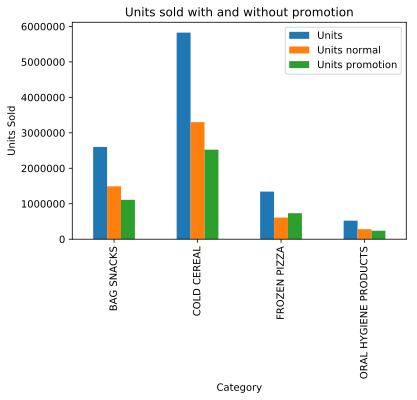

In [7]:
_ = sales_combined.plot(kind='bar', x='CATEGORY', y=['UNITS', 'UNITS_NORMAL', 'UNITS_DISC'],\
                        label=['Units', 'Units normal', 'Units promotion'], title='Units sold with and without promotion')
_ = plt.xlabel("Category")
_ = plt.ylabel("Units Sold")
plt.show()

#### Sales by Feature, Display, or TPR_Only

In [8]:
Total_sale_feature = transactions[transactions.FEATURE==1]\
                     .merge(products[['UPC','CATEGORY']], on='UPC', how='left')\
                     .groupby('CATEGORY').UNITS.sum().reset_index()\
                     .rename(columns={'UNITS':'UNITS_FEATURE'})
Total_sale_display = transactions[transactions.DISPLAY==1]\
                     .merge(products[['UPC','CATEGORY']], on='UPC', how='left')\
                     .groupby('CATEGORY').UNITS.sum().reset_index()\
                     .rename(columns={'UNITS':'UNITS_DISPLAY'})
Total_sale_Only = transactions[transactions.TPR_ONLY==1]\
                    .merge(products[['UPC','CATEGORY']], on='UPC', how='left')\
                     .groupby('CATEGORY').UNITS.sum().reset_index()\
                     .rename(columns={'UNITS':'UNITS_ONLY'})

In [9]:
discounts_combined = Total_sale_feature\
                 .merge(Total_sale_display, on='CATEGORY', how='left')\
                 .merge(Total_sale_Only, on='CATEGORY', how='left')
discounts_combined

,CATEGORY,UNITS_FEATURE,UNITS_DISPLAY,UNITS_ONLY
0,BAG SNACKS,111079,720174,346612
1,COLD CEREAL,1522949,1377438,678374
2,FROZEN PIZZA,481440,453065,117074
3,ORAL HYGIENE PRODUCTS,63865,83171,116815


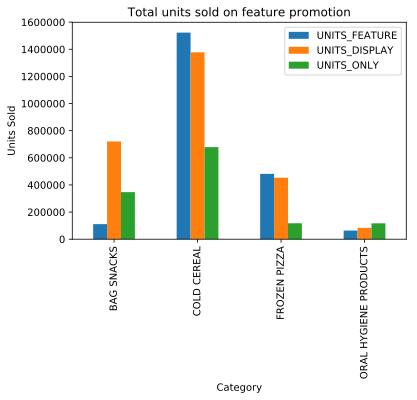

In [12]:
_ = discounts_combined.plot(kind='bar', x='CATEGORY', y=['UNITS_FEATURE','UNITS_DISPLAY', 'UNITS_ONLY'] title='Total units sold on feature promotion')
_ = plt.xlabel("Category")
_ = plt.ylabel("Units Sold")
plt.show()


### Normalised sales

In [13]:
Ndays_normal = transactions[transactions.Discount==0]\
                     .groupby(['WEEK_END_DATE','UPC'])\
                     .STORE_NUM.size().reset_index()\
                     .groupby('UPC').STORE_NUM.sum().reset_index()\
                     .merge(products[['UPC','CATEGORY']], on='UPC', how='left')\
                     .groupby('CATEGORY').STORE_NUM.sum().reset_index()\
                     .rename(columns={'STORE_NUM':'NORM_UNITS_NORMAL'})

Ndays_discount = transactions[transactions.Discount==1]\
                     .groupby(['WEEK_END_DATE','UPC'])\
                     .STORE_NUM.size().reset_index()\
                     .groupby('UPC').STORE_NUM.sum().reset_index()\
                     .merge(products[['UPC','CATEGORY']], on='UPC', how='left')\
                     .groupby('CATEGORY').STORE_NUM.sum().reset_index()\
                     .rename(columns={'STORE_NUM':'NORM_UNITS_DISC'})

In [14]:
#Normalised data sets

Normalised_sale_normal = Total_sale_normal.copy(deep= True)
Normalised_sale_normal.UNITS_NORMAL = Normalised_sale_normal.UNITS_NORMAL\
                                      /Ndays_normal.NORM_UNITS_NORMAL

Normalised_sale_discount = Total_sale_discount.copy(deep= True)
Normalised_sale_discount.UNITS_DISC = Normalised_sale_discount.UNITS_DISC\
                                      /Ndays_discount.NORM_UNITS_DISC


In [15]:
Normalised_sales_combined = Normalised_sale_normal\
                 .merge(Normalised_sale_discount, on='CATEGORY', how='left')

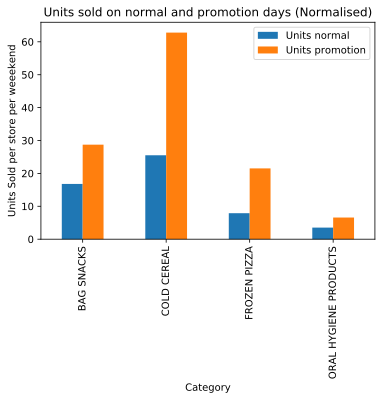

In [16]:
_ = Normalised_sales_combined.plot(kind='bar', x='CATEGORY', y=['UNITS_NORMAL', 'UNITS_DISC'],\
                        label=['Units normal', 'Units promotion'],\
                                   title='Units sold on normal and promotion days (Normalised)')
_ = plt.xlabel("Category")
_ = plt.ylabel("Units Sold per store per weeekend")
plt.show()

#### Sales by Feature, Display, or TPR_Only (Normalised)

In [19]:
Ndays_feature = transactions[transactions.FEATURE==1]\
                     .groupby(['WEEK_END_DATE','UPC'])\
                     .STORE_NUM.size().reset_index()\
                     .groupby('UPC').STORE_NUM.sum().reset_index()\
                     .merge(products[['UPC','CATEGORY']], on='UPC', how='left')\
                     .groupby('CATEGORY').STORE_NUM.sum().reset_index()\
                     .rename(columns={'STORE_NUM':'NORM_UNITS_FEATURE'})
 
Ndays_display = transactions[transactions.DISPLAY==1]\
                     .groupby(['WEEK_END_DATE','UPC'])\
                     .STORE_NUM.size().reset_index()\
                     .groupby('UPC').STORE_NUM.sum().reset_index()\
                     .merge(products[['UPC','CATEGORY']], on='UPC', how='left')\
                     .groupby('CATEGORY').STORE_NUM.sum().reset_index()\
                     .rename(columns={'STORE_NUM':'NORM_UNITS_DISPLAY'})

Ndays_Only = transactions[transactions.TPR_ONLY==1]\
                     .groupby(['WEEK_END_DATE','UPC'])\
                     .STORE_NUM.size().reset_index()\
                     .groupby('UPC').STORE_NUM.sum().reset_index()\
                     .merge(products[['UPC','CATEGORY']], on='UPC', how='left')\
                     .groupby('CATEGORY').STORE_NUM.sum().reset_index()\
                     .rename(columns={'STORE_NUM':'NORM_UNITS_ONLY'})

In [20]:
#Normalised most sucessful type of promotion: 

Normalised_sale_feature = Total_sale_feature.copy(deep= True)
Normalised_sale_feature.UNITS_FEATURE = Normalised_sale_feature.UNITS_FEATURE\
                                     /Ndays_feature.NORM_UNITS_FEATURE

Normalised_sale_display = Total_sale_display.copy(deep= True)
Normalised_sale_display.UNITS_DISPLAY = Normalised_sale_display.UNITS_DISPLAY\
                                      /Ndays_display.NORM_UNITS_DISPLAY

Normalised_sale_Only = Total_sale_Only.copy(deep= True)
Normalised_sale_Only.UNITS_ONLY = Normalised_sale_Only.UNITS_ONLY\
                                      /Ndays_Only.NORM_UNITS_ONLY

In [22]:
Normalised_disc_combined = Normalised_sale_feature\
                 .merge(Normalised_sale_display, on='CATEGORY', how='left')\
                 .merge(Normalised_sale_Only, on='CATEGORY', how='left')

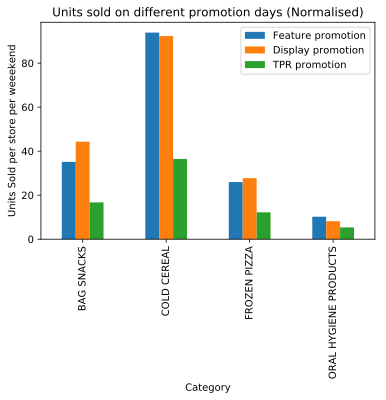

In [23]:
_ = Normalised_disc_combined.plot(kind='bar', x='CATEGORY', y=['UNITS_FEATURE', 'UNITS_DISPLAY', 'UNITS_ONLY'],\
                        label=['Feature promotion', 'Display promotion', 'TPR promotion'],\
                        title='Units sold on different promotion days (Normalised)')
_ = plt.xlabel("Category")
_ = plt.ylabel("Units Sold per store per weeekend")
plt.show()

#### How discount percentages impact sales

In [25]:
def discount_percentage_database(discount_class_length):
    discount = np.linspace(0,1,round(1/discount_class_length)+1)
    #discount = [ '%.2f' % elem for elem in discount ]
    discount_range = zip(discount[0:-1],discount[1:])
    normalised_bypercentage = pd.DataFrame({'CATEGORY': products.CATEGORY.unique()})
    for discount_bin in discount_range:
        temp='{}-{}%'.format('%.2f' % discount_bin[0],'%.2f' % discount_bin[1])
        sale_temp = transactions[(transactions.Discount_Percentage > discount_bin[0]) &\
                                  (transactions.Discount_Percentage <= discount_bin[1])]\
                      .merge(products[['UPC','CATEGORY']], on='UPC', how='left')\
                      .groupby('CATEGORY').UNITS.sum().reset_index()\
                      .rename(columns={'UNITS':temp})
        ndays_temp = transactions[(transactions.Discount_Percentage > discount_bin[0]) &\
                                  (transactions.Discount_Percentage <= discount_bin[1])]\
                      .groupby(['WEEK_END_DATE','UPC'])\
                    .STORE_NUM.size().reset_index()\
                      .groupby('UPC').STORE_NUM.sum().reset_index()\
                      .merge(products[['UPC','CATEGORY']], on='UPC', how='left')\
                      .groupby('CATEGORY').STORE_NUM.sum().reset_index()
        sale_temp[temp] = sale_temp[temp]/ndays_temp.STORE_NUM
        normalised_bypercentage = normalised_bypercentage.merge(sale_temp, on='CATEGORY', how='left') 
    return normalised_bypercentage

In [26]:
discount_sales = discount_percentage_database(0.3)

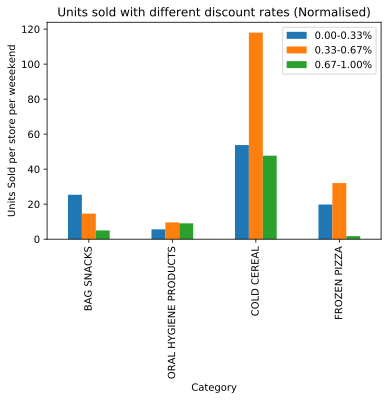

In [27]:
_ = discount_sales.plot(kind='bar', x='CATEGORY', y=discount_sales.columns.to_list()[1:],\
                        title='Units sold with different discount rates (Normalised)')
_ = plt.xlabel("Category")
_ = plt.ylabel("Units Sold per store per weeekend")
plt.show()

In [52]:
# transactions=pd.read_excel("data/userdata.xlsx", sheet_name='dh Transaction Data')
# transactions1=transactions.copy(deep = True)
# transactions1=transactions1.dropna(axis='columns', how='all')
# transactions1.columns=transactions1.iloc[0].to_list()
# transactions1.drop(0, inplace=True)
# transactions1 =transactions1.to_csv ('data/products.csv', index = None, header=True)